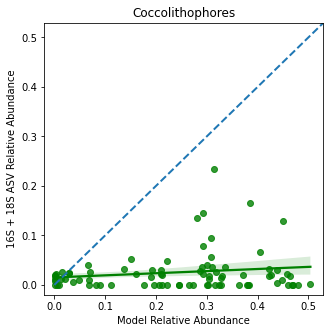

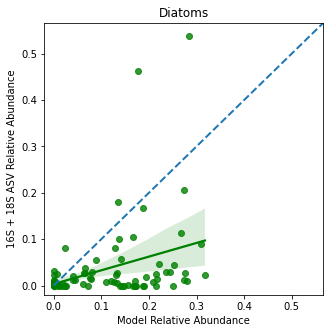

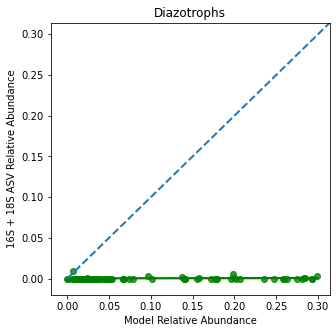

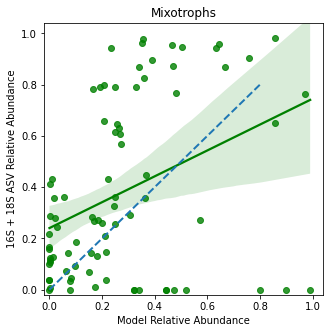

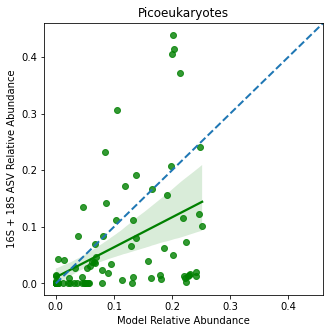

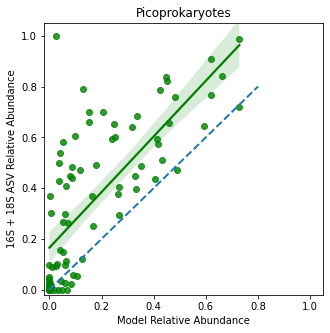

'\norphans = ["nanoplankton", "phaeocystis"]\nfor taxon in orphans:\n    fig, ax = plt.subplots(1, 1, figsize=(8, 5))\n    plot = sns.barplot(x="SampleID", y=taxon, data=modelASVdf, color = "red")\n    plot.set(xticklabels=[])\n    plot.set(title="Model Relative Abundance for " + taxon)\n    plot.set(xlabel="Sample Number (West to East)")\n    plt.savefig(taxon + ".pdf")\n'

In [35]:
#import plotting packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#make output directories to keep things organized
import os, datetime
now = datetime.datetime.now()
dateStamp = (now.strftime("%y%m%d"))
outdir = os.getcwd() + "/" + dateStamp + "-scatterplots_model-ASV/"

#make directory, proceeding even if FileExistsError crops up 
#(i.e. you've run the script multiple times the same day)
try:
    os.mkdir(outdir)
except Exception:
    pass

#define your input
infile = "plot-input/GA03-sample-metadata+darwin_2011+ASVs.tsv"

#import model and ASV data collapsed to corresponding model categories
modelASVdf = pd.read_csv(infile, sep="\t")
list(modelASVdf)
hashComparison = {"Coccolithophores":["cocco_rel_conc","cocco"], \
                  "Diatoms":["diat_rel_conc","diat"],\
                  "Diazotrophs":["diaz_rel_conc","diaz"],\
                  "Mixotrophs":["mixo_rel_conc","mixo"],\
                  "Picoeukaryotes":["pico_eu_rel_conc","pico_eu"],\
                  "Picoprokaryotes":["pico_pro_rel_conc","picopro"]
                 }

#plot recursively using seaborn
for taxon in hashComparison.keys():
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    #plot = sns.barplot(x="SampleID", y=hashComparison[taxon][0], data=modelASVdf, color = "blue", ax=ax[0])
    #plot.set(xticklabels=[])
    #plot.set(title="Model Relative Abundance for " + taxon)
    #plot.set(xlabel=None)#"Sample Number (West to East)")
    #plot.set(xlabel="Sample Number (West to East)")
    #plot2 = sns.barplot(x="SampleID", y=hashComparison[taxon][1], data=modelASVdf, color = "purple", ax=ax[1])
    #plot2.set(xticklabels=[])
    #plot2.set(title="16S ASV Relative Abundance for " + taxon)
    #plot2.set(xlabel="Sample Number (West to East)")
    axMax = max(list(modelASVdf[[hashComparison[taxon][0], hashComparison[taxon][1]]].max(axis=0))) * 1.05
    plot3 = sns.regplot(x=hashComparison[taxon][0], y=hashComparison[taxon][1], data=modelASVdf, color = "green")
    plot3.plot([0, 0.8], [0, 0.8], '--', linewidth=2, label="1:1 line")
    plot3.axis(xmin=-0.02,xmax=axMax)
    plot3.axis(ymin=-0.02,ymax=axMax)
    #plot3.set(xticklabels=[])
    plot3.set(title=taxon)
    plot3.set(xlabel="Model Relative Abundance")
    plot3.set(ylabel="16S + 18S ASV Relative Abundance")
    #plt.savefig(taxon + "_scatterplot.pdf")
    plt.savefig(outdir + dateStamp + "_" + taxon + "_scatterplot.svg")
    plt.savefig(outdir + dateStamp + "_" + taxon + "_scatterplot.pdf")
    plt.show()

    
"""
orphans = ["nanoplankton", "phaeocystis"]
for taxon in orphans:
    fig, ax = plt.subplots(1, 1, figsize=(8, 5))
    plot = sns.barplot(x="SampleID", y=taxon, data=modelASVdf, color = "red")
    plot.set(xticklabels=[])
    plot.set(title="Model Relative Abundance for " + taxon)
    plot.set(xlabel="Sample Number (West to East)")
    plt.savefig(taxon + ".pdf")
"""

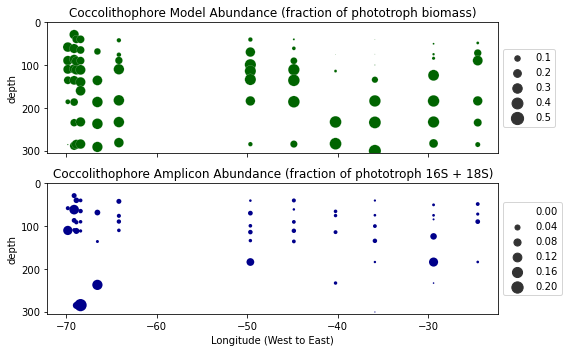

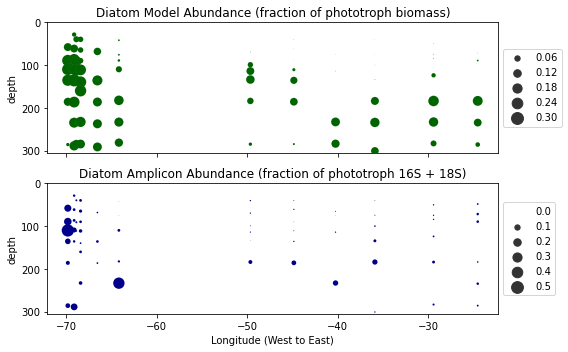

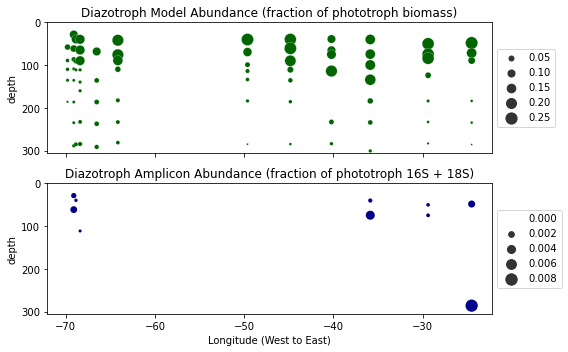

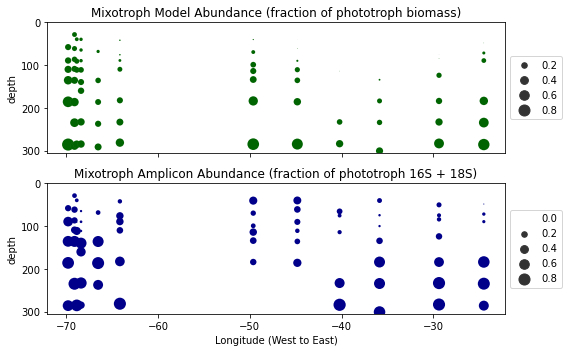

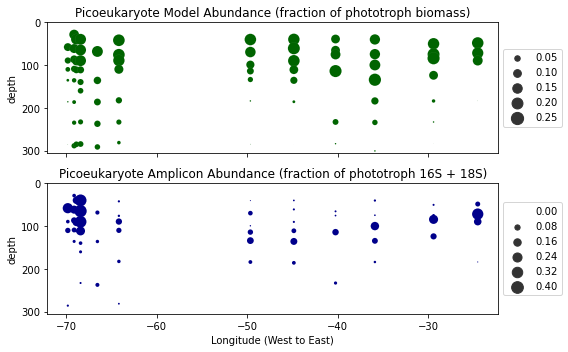

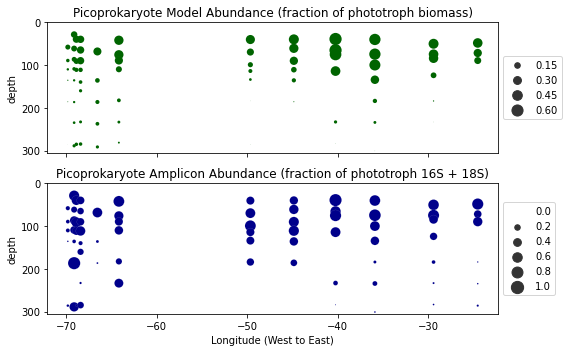

In [36]:
#import plotting packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#maximum depth parameter for section plots, may need to be changed
maxdepth = 305

#make output directories to keep things organized
import os, datetime
now = datetime.datetime.now()
dateStamp = (now.strftime("%y%m%d"))
outdir = os.getcwd() + "/" + dateStamp + "-sectionplots_model-ASV/"

#make directory, proceeding even if FileExistsError crops up 
#(i.e. you've run the script multiple times the same day)
try:
    os.mkdir(outdir)
except Exception:
    pass

#define your input
infile = "plot-input/GA03-sample-metadata+darwin_2011+ASVs.tsv"

#import model and ASV data collapsed to corresponding model categories
modelASVdf = pd.read_csv(infile, sep="\t")
hashComparison = {"Coccolithophore":["cocco_rel_conc","cocco"], \
                  "Diatom":["diat_rel_conc","diat"],\
                  "Diazotroph":["diaz_rel_conc","diaz"],\
                  "Mixotroph":["mixo_rel_conc","mixo"],\
                  "Picoeukaryote":["pico_eu_rel_conc","pico_eu"],\
                  "Picoprokaryote":["pico_pro_rel_conc","picopro"]
                 }

#plot recursively using seaborn
for taxon in hashComparison.keys():
    fig, ax = plt.subplots(2, 1, figsize=(8, 5))
    plot = sns.scatterplot(x="long", y="depth", size=hashComparison[taxon][0], sizes=(0,150), data=modelASVdf, color = "darkgreen", ax=ax[0])
    plot.set(xticklabels=[])
    plot.set(title=taxon + " Model Abundance" + " (fraction of phototroph biomass)")
    plot.set(xlabel=None)#"Sample Number (West to East)")
    #plot.set(xlabel="Longitude (West to East)")
    plot.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plot2 = sns.scatterplot(x="long", y="depth", size=hashComparison[taxon][1], sizes=(0,150), data=modelASVdf, color = "darkblue", ax=ax[1])
    #plot2.set(xticklabels=[])
    plot2.set(title=taxon + " Amplicon Abundance" + " (fraction of phototroph 16S + 18S)")
    plot2.set(xlabel="Longitude (West to East)")
    ax[1].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    for num in [0,1]:
        ax[num].set_ylim(0,maxdepth)
        ax[num].invert_yaxis()
    #plt.show()
    plt.tight_layout()
    plt.savefig(outdir + dateStamp + "_" + taxon + "_sectionplot.svg")
    plt.savefig(outdir + dateStamp + "_" + taxon + "_sectionplot.pdf")
    
    """
orphans = ["nanoplankton", "phaeocystis"]
for taxon in orphans:
    fig, ax = plt.subplots(1, 1, figsize=(8, 5))
    plot = sns.barplot(x="SampleID", y=taxon, data=modelASVdf, color = "red")
    plot.set(xticklabels=[])
    plot.set(title="Model Relative Abundance for " + taxon)
    plot.set(xlabel="Sample Number (West to East)")
    plt.savefig(taxon + ".pdf")
    """